# Poisson problem

Let us solve the Poisson problem of finding $u$ satisfying 

$$
\begin{aligned}
-\Delta u + u& = f && \text { in  } (0,10)^2,
\\
\frac{\partial u }{\partial n } & = 0 
&& \text{ on the boundary parts}.
\end{aligned}
$$

## Quick steps to solution:

#### 1. Import NGSolve and Netgen Python modules:

In [1]:
from ngsolve import *
from ngsolve.webgui import Draw

#### 2. Main discretization parameters and mesh

In [2]:
order_list = [i for i in range(3,12)]
maxh = 0.3

from netgen.geom2d import SplineGeometry
geo = SplineGeometry()
geo.AddRectangle((0,0), (10,10), bcs=['bottom','right','top','left'])

mesh = Mesh(geo.GenerateMesh(maxh=maxh))
mesh.nv, mesh.ne

(1354, 2574)

#### 3. Reference solution and corresponding right hand side


In [3]:
ref_sol = exp(-2*((x-4)**2+(y-6)**2))
Draw(ref_sol, mesh, "reference solution")

refdx = ref_sol.Diff(x)
refdy = ref_sol.Diff(y)
rhs = -refdx.Diff(x)-refdy.Diff(y) + ref_sol

ref_sol_grad = CoefficientFunction( (refdx,refdy) )

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

#### 4. Declare a finite element space and gridfunction

In [4]:
fes_list = [H1(mesh, order=order) for order in order_list]# fe space
sol_list = [GridFunction(fes) for fes in fes_list]  # solution 
print([fes[i].ndof] for i in range(len(fes_list))) # number of degrees of freedom

<generator object <genexpr> at 0x000002641721DAC8>


#### 5. Define and assemble linear and bilinear forms

In [5]:
u_list = [fes_list[i].TrialFunction() for i in range(len(fes_list))]  # symbolic object
v_list = [fes_list[i].TestFunction() for i in range(len(fes_list))]   # symbolic object

a_list = [BilinearForm(fes, symmetric=True) for fes in fes_list]

for i in range(len(a_list)):
    a_list[i] += (grad(u_list[i])*grad(v_list[i]) + u_list[i]*v_list[i])*dx
    a_list[i].Assemble()

f_list = [LinearForm(fes) for fes in fes_list]

for i in range(len(f_list)):
    f_list[i] += rhs*v_list[i]*dx
    f_list[i].Assemble()

#### 6. Solve system and draw solution

In [6]:
from time import time

t1 = time()
for i in range(len(fes_list)):
    sol_list[i].vec.data = a_list[i].mat.Inverse(freedofs=fes_list[i].FreeDofs()) * f_list[i].vec
print("time = ", time()-t1)

for i in range(len(fes_list)):
    Draw(sol_list[i], mesh, "sol")

time =  3.5002002716064453


NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

#### 7. Compute error

In [7]:
#Draw(sqrt((ref_sol-sol)**2 + InnerProduct(ref_sol_grad-Grad(sol),ref_sol_grad-Grad(sol))), mesh, 'error')
H1err_list = [sqrt( Integrate((ref_sol-sol_list[i])**2 + InnerProduct(ref_sol_grad-Grad(sol_list[i]),ref_sol_grad-Grad(sol_list[i])), mesh, VOL, 2*order_list[i]))for i in range(len(order_list))]
#help(Integrate)
print(H1err_list)

[0.0035546068010845226, 0.00027242801736717206, 1.8169876605252496e-05, 1.1695620056955967e-06, 6.732897808440484e-08, 3.865651827788603e-09, 2.0439289834413966e-10, 1.0505848645292818e-11, 5.827428960495554e-13]


#### 8. Draw error plot

<IPython.core.display.Javascript object>


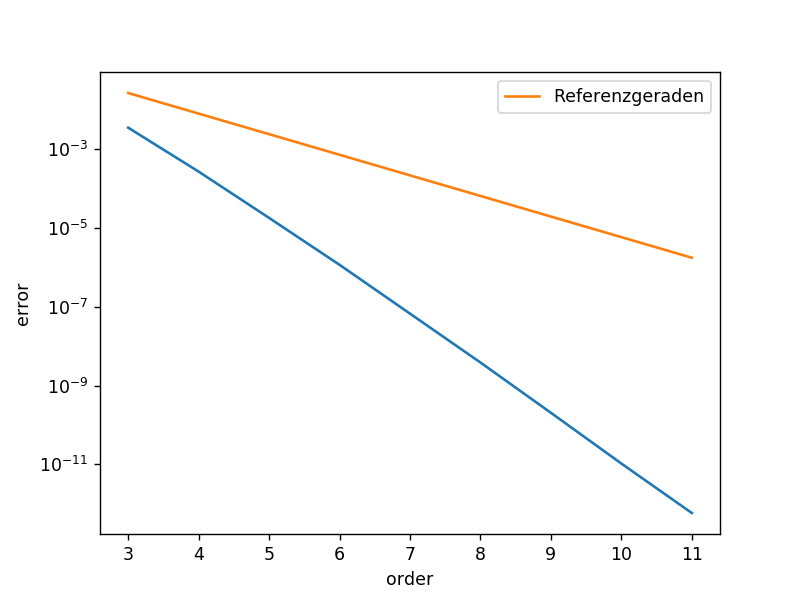

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(order_list, H1err_list)
plt.plot(order_list, [maxh**(order) for order in order_list], label = "Referenzgeraden")

plt.yscale('log')
plt.xlabel("order")
plt.ylabel("error")
plt.legend()
plt.show()